# Examen 1 - Portafolios de inversión - O2018. Tipo 3.

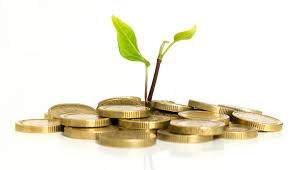

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos primeros módulos.

> El examen consta de dos partes. 
1. La primera consiste en demostrar un resultado particular de los que hemos obtenido hasta ahora en el curso. 
2. La segunda parte es práctica, como lo que se ha venido haciendo en las tareas. En esta parte deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de compañías en una base mensual, deberás caracterizar los rendimientos y con base en ello construir fronteras media-varianza bajo ciertas condiciones. Finalmente deberás concluir de los resultados.

**Criterio de revisión.**
> Primera parte: tiene un valor del 40% del examen. Para la calificación, tenga en cuenta que se considerará el nivel de detalle de la demostración, la claridad en la redacción de la misma, así como la obtención del resultado en cuestión.

> Segunda parte: tiene un valor del 60% del examen. Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen1_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen1_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

## I. Primera parte (40%)

Sean $A_1,A_2,\dots,A_n$ un conjunto de $n$ activos, y $w_1,w_2,\dots,w_n$ los pesos respectivos de cada activo en el portafolio cuyo rendimiento en el escenario de la economía $j\in\{1,2,\dots,m\}$ es

$$r_{P,j} = \sum_{i=1}^{n}w_i r_{i,j}$$

donde $r_{i,j}$ es el rendimiento del activo $i\in\{1,2,\dots,n\}$ en el escenario $j$.

Demuestre, con todo nivel de detalle y claridad, que la volatilidad de los rendimientos de este portafolio está dada por

$$\sigma_P = \sqrt{\sum_{i=1}^{n}\sum_{k=1}^{n} w_i w_k \sigma_{i,k}}$$

donde $\sigma_{i,k}$ es la covarianza de los rendimientos del activo $i$ con los rendimientos del activo $k$.

Rúbrica:
1. Definición de todas las variables involucradas en la demostración (10%).
2. Planteamiento correcto de las ecuaciones iniciales (10%).
3. Obtención del resultado (20%).
 - Particularmente, para este resultado deberá llegar a la ecuación de la volatilidad del portafolio enunciada arriba.

___
## II. Segunda parte (60%)

**Punto 1 (15%).** En los archivos `data_mx.csv` y `data_us.csv` se encuentran reportados los **precios mensuales ajustados en el cierre** de los activos de Grupo Financiero Banorte, Grupo Financiero Inbursa, Grupo Aeroportuario del Pacífico y Herdez, y Microsoft, Apple, Coca-Cola y Nike, respectivamente, desde inicios del 2012 hasta el úlimo mes reportado.

1. Importar los **precios de mensuales** de las compañías <font color=red>mexicanas</font> en un **DataFrame indizado por fecha** (5%): 
 - Mostrar la gráfica de estos precios.
 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.
 
2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

3. De acuerdo a lo obtenido en el punto anterior, elija el par de activos que le ofrezca **la mejor oportunidad para diversificar**. Con estos activos seguirá trabajando en el resto del examen. **Escriba claramente qué activos seleccionó en una celda tipo markdown** (5%).

In [34]:
#Importamos librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [35]:
#DataFrame de las compañias mexicanas
data= pd.read_csv('data_mx.csv', index_col= 'Date')
data.head()

,GFNORTEO.MX,GFINBURO.MX,GAPB.MX,HERDEZ.MX
Date,,,,
2012-01-01,42.683975,24.214586,33.528374,21.378975
2012-02-01,42.733276,22.782784,33.040562,22.007769
2012-03-01,46.882656,23.908413,32.490913,22.217367
2012-04-01,51.787735,25.799479,34.820030,24.145668
2012-05-01,52.851185,26.663961,35.067375,23.977989


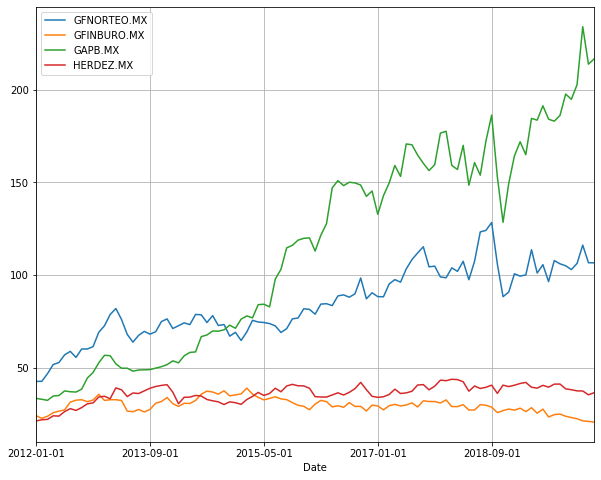

In [36]:
#Gráfica 
data.plot(figsize=(10,8),grid=True)
plt.show()

In [37]:
#DataFrame con los rendimientos mensuales
ret = data.pct_change().dropna()
ret.head()

,GFNORTEO.MX,GFINBURO.MX,GAPB.MX,HERDEZ.MX
Date,,,,
2012-02-01,0.001155,-0.059130,-0.014549,0.029412
2012-03-01,0.097099,0.049407,-0.016636,0.009524
2012-04-01,0.104625,0.079096,0.071685,0.086793
2012-05-01,0.020535,0.033508,0.007104,-0.006944
2012-06-01,0.078421,0.024434,0.070862,0.101290


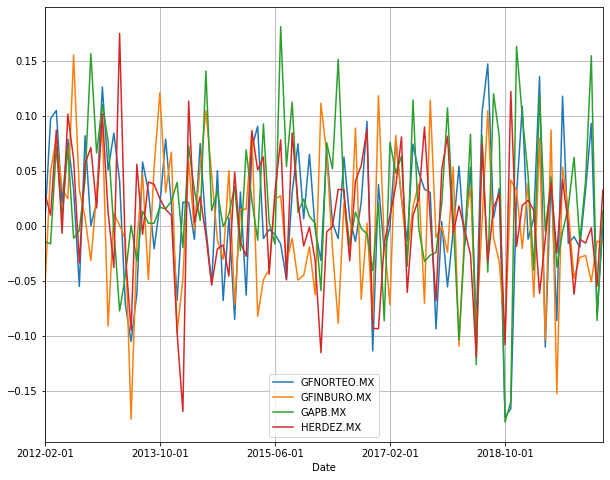

In [38]:
#Gráfica de rendimientos 
ret.plot(figsize=(10,8),grid=True)
plt.show()

In [39]:
#DataFrame rendimiento esperado y volatilidad mensual
tabla= pd.DataFrame(data={'Media':ret.mean(),
                          'Volatilidad':ret.std()},
                        index=ret.columns)
tabla

,Media,Volatilidad
GFNORTEO.MX,0.011432,0.063970
GFINBURO.MX,0.000476,0.063812
GAPB.MX,0.021343,0.065894
HERDEZ.MX,0.007189,0.058250


In [40]:
#Matriz de varianza-covarianza 
mcov=data.cov()
mcov

,GFNORTEO.MX,GFINBURO.MX,GAPB.MX,HERDEZ.MX
GFNORTEO.MX,359.716418,-20.797836,967.150396,67.778141
GFINBURO.MX,-20.797836,14.953208,-95.960244,-1.284114
GAPB.MX,967.150396,-95.960244,3174.468282,176.332270
HERDEZ.MX,67.778141,-1.284114,176.332270,24.041781


In [41]:
#Matriz de correlación
mcorr=data.corr()
mcorr

,GFNORTEO.MX,GFINBURO.MX,GAPB.MX,HERDEZ.MX
GFNORTEO.MX,1.000000,-0.283577,0.905062,0.728830
GFINBURO.MX,-0.283577,1.000000,-0.440442,-0.067726
GAPB.MX,0.905062,-0.440442,1.000000,0.638283
HERDEZ.MX,0.728830,-0.067726,0.638283,1.000000


In [42]:
mcorr.min()

GFNORTEO.MX   -0.283577
GFINBURO.MX   -0.440442
GAPB.MX       -0.440442
HERDEZ.MX     -0.067726
dtype: float64

**Después de analizar los datos de la matriz de correlación, podemos observar que a menor correlación, mayor oportunidad de diversificación por lo que tomaremos el Grupo Financiero Inbursa y Grupo Aeroportuario del Pacífico para realizar los siguientes ejercicios.**

**Punto 2 (20%).** Usando los datos que obtuvo para los **activos que seleccionó** en el punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los activos que **seleccionó en el primer punto**. Reportar los **rendimientos esperados y las volatilidades de estos portafolios (base mensual) en un DataFrame** (10%).

2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (10%).

In [43]:
# Construcción de la frontera de mínima varianza
# Vector de w variando entre 0 y 1 con n pasos
N=101
w= np.linspace(0,1, N)
# Rendimientos esperados individuales
# Activo1: GFINBURO, Activo2:GAPB
E1= tabla.loc['GFINBURO.MX', 'Media']
E2= tabla.loc['GAPB.MX','Media']
# Volatilidades individuales
s1= tabla.loc['GFINBURO.MX','Volatilidad']
s2= tabla.loc['GAPB.MX','Volatilidad']
# Correlacion
r12= corr.loc['GAPB.MX','GFINBURO.MX']
E1,E2,s1,s2, r12

(0.00047589693926944625,
 0.021342952271040848,
 0.06381169892618883,
 0.06589446538615933,
 -0.44044194129133196)

In [44]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios2 = pd.DataFrame({'w':w,
                            'Media' : w*E1 + (1-w) *E2, 
                            'Volatilidad' : ((w*s1)**2 + ((1-w)*s2)**2 + 2*w*(1-w)*s1*s2*r12)**.5
                            },
                           index=range(1, N+1)
                           )
portafolios2

,w,Media,Volatilidad
1,0.00,0.021343,0.065894
2,0.01,0.021134,0.064957
3,0.02,0.020926,0.064025
4,0.03,0.020717,0.063098
5,0.04,0.020508,0.062177
...,...,...,...
97,0.96,0.001311,0.060145
98,0.97,0.001102,0.061052
99,0.98,0.000893,0.061966
100,0.99,0.000685,0.062886


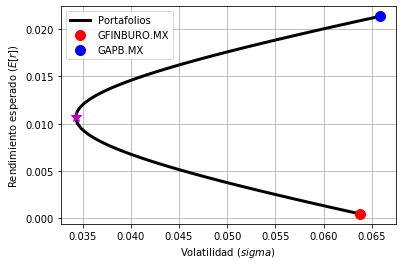

In [71]:
plt.plot(portafolios2['Volatilidad'],
        portafolios2['Media'],
        'k', lw=3, label='Portafolios'
        )
#lw: line width
plt.plot(s1, E1, 'or', ms=10, label='GFINBURO.MX')
plt.plot(s2, E2, 'ob', ms=10, label='GAPB.MX')
plt.legend(loc='best')
plt.plot(s_minvar, E_minvar, '*m', ms=10, label='Portafolio min. Var. 2')
plt.grid()
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.show()

In [57]:
#Encontrar los pesos del portafolio de mínima varianza
# Calcular w_minvar y mostrar...
s12 = r12 *s1*s2
w_minvar = (s2**2-s12)/(s1**2+s2**2-2*s12)
w_minvar, 1-w_minvar

(0.5111465560030514, 0.48885344399694863)

**<font color='red'>Conclusión: Para conseguir una inversión que se equipare al portafolio de mínima varianza, se debería de invertir aproximadamente el 51.11% en acciones de Grupo Financiero Inbursa y el 48.88% en acciones de Grupo Aeroportuario del Pacífico.**</font>

In [58]:
# Función objetivo
def varianza(w, s1, s2, s12):
    w1 = w[0]
    w2 = w[1]
    return (s1 * w1)**2 + (s2 * w2)**2 + 2 * w1 * w2 *s12

In [59]:
# Dato inicial
w0 = [0.5, 0.5]
# Volatilidades individuales
# s1, s2
# Correlacion
# r12
# Covarianza
s12 = r12 * s1 * s2
# Cota de w
bnds = ((0, None),) * 2
# Restricciones con diccionario: {}, eq-equality, fun-funcion
cons = {'type' : 'eq', 'fun': lambda w: w.sum() -1}

In [60]:
# Solución
minvar2 = minimize (fun=varianza,
                    x0 = w0,
                    args = (s1,s2,s12), #variables involucradas pero que no se esta trabajando en ellas
                    bounds = bnds,
                    constraints=cons)
minvar2

     fun: 0.0011775099134258295
     jac: array([0.00221995, 0.00249009])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.5, 0.5])

In [61]:
# Peso del portafolio de minima varianza
minvar2.x

array([0.5, 0.5])

In [62]:
w_minvar_opt = minvar2.x[0]
w_minvar_opt, 1 - w_minvar_opt, w_minvar, 1 - w_minvar

(0.5, 0.5, 0.5111465560030514, 0.48885344399694863)

In [63]:
#Valor esperado y Volatilidad
E_minvar = w_minvar * E1 + (1- w_minvar) * E2
s_minvar = varianza([w_minvar, 1- w_minvar], s1, s2, s12)**.5
E_minvar, s_minvar

(0.010676828804280785, 0.03429291917405503)

**Punto 3 (15%).** En este punto se usarán los mismos **activos que seleccionó** en el punto 1 con sus rendimientos esperados y volatilidades, solo que **el coeficiente de correlación entre sus rendimientos se supondrá de 0.5**.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos **con el nuevo supuesto de correlación**. Reportar **los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame** (8%).
2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (7%).

In [64]:
# Calcular w_minvar y mostrar...
coefcorr=0.5
s13 = coefcorr *s1*s2
w_minvar = (s2**2-s13)/(s1**2+s2**2-2*s13)
w_minvar, 1-w_minvar

(0.5320903269180163, 0.4679096730819837)

In [65]:
# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas
portafolios3 = pd.DataFrame({'w':w,
                            'Media' : w*E1 + (1-w) *E2, 
                            'Volatilidad' : ((w*s1)**2 + ((1-w)*s2)**2 + 2*w*(1-w)*s1*s2*0.5)**.5
                            },
                           index=range(1, N+1)
                           )
portafolios3

,w,Media,Volatilidad
1,0.00,0.021343,0.065894
2,0.01,0.021134,0.065557
3,0.02,0.020926,0.065224
4,0.03,0.020717,0.064896
5,0.04,0.020508,0.064573
...,...,...,...
97,0.96,0.001311,0.062619
98,0.97,0.001102,0.062909
99,0.98,0.000893,0.063205
100,0.99,0.000685,0.063506


In [66]:
# Solución
minvar3 = minimize (fun=varianza,
                    x0 = w0,
                    args = (s1,s2,s13), #variables involucradas pero que no se esta trabajando en ellas
                    bounds = bnds,
                    constraints=cons)
minvar3

     fun: 0.003154712818624522
     jac: array([0.00617435, 0.0064445 ])
 message: 'Optimization terminated successfully.'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.5, 0.5])

In [74]:
#Valor esperado y Volatilidad
E_minvar3 = w_minvar * E1 + (1- w_minvar) * E2
s_minvar3= varianza([w_minvar, 1- w_minvar], s1, s2, s13)**.5
E_minvar3, s_minvar3

(0.010239793977742268, 0.056128230467772336)

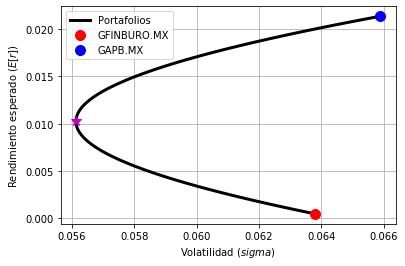

In [75]:
plt.plot(portafolios3['Volatilidad'],
        portafolios3['Media'],
        'k', lw=3, label='Portafolios'
        )
#lw: line width
plt.plot(s1, E1, 'or', ms=10, label='GFINBURO.MX')
plt.plot(s2, E2, 'ob', ms=10, label='GAPB.MX')
plt.legend(loc='best')
plt.grid()
plt.plot(s_minvar3, E_minvar3, '*m', ms=10, label='Portafolio min. Var. 2')
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.show()

# Comparando los portafolios 2 y 3, podemos darnos cuenta de que el portafolio 2 es más eficiente que el portafolio 3 debido a que la correlación que existe entre los activos fue tomada literal y no asumiendo una distinta; por lo tanto, se espera un mayor rendimiento en el portafolio 2 teniendo menor riesgo o volatilidad en la inversión.

**Punto 4 (10%).** 

1. Usando sus respuestas para los puntos 2 y 3, **grafique las dos fronteras encontradas en una sola gráfica**, además de los puntos correspondientes a los activos individuales, y de **los portafolios de mínima varianza para cada caso**, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (5%).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, **¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?**, **¿cómo puede explicar esta diferencia/similitud?** (5%).

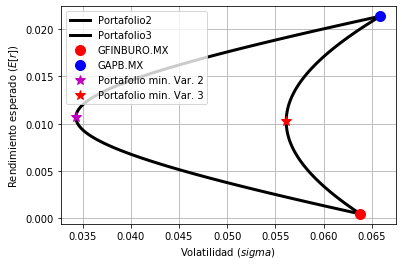

In [76]:
plt.plot(portafolios2['Volatilidad'],
        portafolios2['Media'],
        'k', lw=3, label='Portafolio2'
        )
plt.plot(portafolios3['Volatilidad'],
        portafolios3['Media'],
        'k', lw=3, label='Portafolio3'
        )
#lw: line width
plt.plot(s1, E1, 'or', ms=10, label='GFINBURO.MX')
plt.plot(s2, E2, 'ob', ms=10, label='GAPB.MX')
plt.plot(s_minvar, E_minvar, '*m', ms=10, label='Portafolio min. Var. 2')
plt.plot(s_minvar3, E_minvar3, '*r', ms=10, label='Portafolio min. Var. 3')

plt.legend(loc='best')
plt.grid()
plt.xlabel('Volatilidad ($sigma$)')
plt.ylabel('Rendimiento esperado ($E[r]$)')
plt.show()

# Conclusión:

Observando ambos portafolios graficados, se puede observar claramente que en el portafolio 2, la frontera de mínima varianza brinda más diversificación y oportunidad de inversión; además, la frontera de mínima varianza del portafoliuo 3 es casi inútil, debido a que existe otra combinación a la hora de diversificar que permite el mismo rendimiento pero con mucho menor volatilidad.

Esto se debe principalmente a que en el portafolio 3 se asume una correlación entre los activos diferente a la que en realidad tienen, por lo tanto, el rendimiento esperado y la volatidlidad pueden no representar una realidad por lo que es de suma importancia siempre tener la mayor cantidad de datos para poder observar la correlación que existe entre una basta cantidad de activos.

Sin embargo, los pesos de los portafolios de mínima varianza tienen una gran similitud, pero lo que los diferencía principalmente, como se explico en el punto anterior, es la correlación que existe entre los datos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>